In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

In [2]:
# Data Load
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# train, test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=2022)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

### sepal끼리, petal끼리

In [5]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [6]:
x_train_sepal = x_train.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
x_train_petal = x_train.loc[:, ['sepal length (cm)', 'sepal width (cm)']]

In [7]:
x_test_sepal = x_test.loc[:, ['petal length (cm)', 'petal width (cm)']]
x_test_petal = x_test.loc[:, ['petal length (cm)', 'petal width (cm)']]

In [8]:
x_train_sepal.shape, x_test_sepal.shape, x_train_petal.shape, x_test_petal.shape

((120, 2), (30, 2), (120, 2), (30, 2))

In [9]:
# One-hot Encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [10]:
x_train_sepal.shape, x_train_petal.shape, y_train.shape

((120, 2), (120, 2), (120, 3))

### Modeling : multi-input & Concatenate Layer

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add

In [12]:
# 1. Session Clear
clear_session()

# 2. Layer
il_se = Input(shape=(2,))
hl_se = Dense(4, activation='swish')(il_se)

il_pe = Input(shape=(2,))
hl_pe = Dense(4, activation='swish')(il_pe)

add_l = Add()([hl_se, hl_pe])
ol = Dense(3, activation='softmax')(add_l)

# 3. Model
model = Model([il_se, il_pe], ol)

# 4. Compile
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            12          ['input_2[0][0]']                
                                                                                              

### Model Visualization

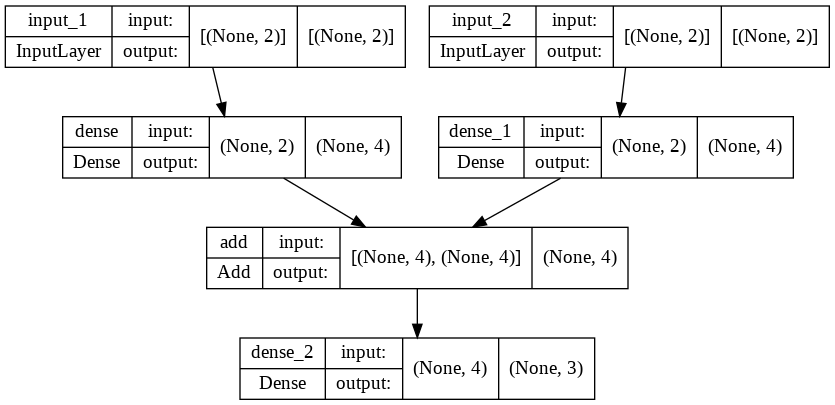

In [14]:
plot_model(model, show_shapes=True)

In [15]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=2,
                   verbose=1,
                   restore_best_weights=True)

In [16]:
model.fit([x_train_sepal, x_train_petal], y_train, validation_split=0.2,
          callbacks=[es], epochs=10000, verbose=1)

Epoch 1/10000
3/3 [==============================] - 3s 151ms/step - loss: 7.8158 - accuracy: 0.3438 - val_loss: 6.5128 - val_accuracy: 0.3750
Epoch 2/10000
3/3 [==============================] - 0s 17ms/step - loss: 7.6526 - accuracy: 0.3438 - val_loss: 6.3654 - val_accuracy: 0.3750
Epoch 3/10000
3/3 [==============================] - 0s 16ms/step - loss: 7.4938 - accuracy: 0.3438 - val_loss: 6.2199 - val_accuracy: 0.3750
Epoch 4/10000
3/3 [==============================] - 0s 16ms/step - loss: 7.3298 - accuracy: 0.3438 - val_loss: 6.0768 - val_accuracy: 0.3750
Epoch 5/10000
3/3 [==============================] - 0s 15ms/step - loss: 7.1719 - accuracy: 0.3438 - val_loss: 5.9361 - val_accuracy: 0.3750
Epoch 6/10000
3/3 [==============================] - 0s 16ms/step - loss: 7.0167 - accuracy: 0.3438 - val_loss: 5.7975 - val_accuracy: 0.3750
Epoch 7/10000
3/3 [==============================] - 0s 16ms/step - loss: 6.8655 - accuracy: 0.3438 - val_loss: 5.6602 - val_accuracy: 0.3750
Epoch